In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 항공권 Dataset

In [29]:
# 01. 데이터 수집 및 로딩
df = pd.read_csv('data/synthetic_flight_passenger_data.csv')
df.head()

,Passenger_ID,Flight_ID,Airline,Departure_Airport,Arrival_Airport,Departure_Time,Flight_Duration_Minutes,Flight_Status,Distance_Miles,Price_USD,...,Bags_Checked,Frequent_Flyer_Status,Check_in_Method,Flight_Satisfaction_Score,Delay_Minutes,Booking_Days_In_Advance,No_Show,Weather_Impact,Seat_Selected,Booking_Lead_Time
0,P1,F68,Southwest,JFK,ATL,2024-03-27 06:22:06,161,On-time,803,148.42,...,2,Platinum,Online,8.801356,0.0,91,1,1,Window,102
1,P2,F1687,Southwest,JFK,DFW,2024-12-28 09:18:06,130,On-time,1605,228.57,...,1,Gold,Airport Kiosk,9.094380,2.0,45,0,0,Middle,51
2,P3,F1745,United,ORD,ORD,2024-05-23 23:28:20,169,On-time,908,232.45,...,0,Silver,Airport Kiosk,8.015235,0.0,63,0,0,Middle,92
3,P4,F1514,Delta,SEA,ORD,2023-10-31 08:09:27,227,On-time,63,526.43,...,0,Platinum,Online,7.544133,9.0,57,0,1,Window,14
4,P5,F1753,Southwest,LAX,JFK,2025-01-17 22:21:13,150,On-time,628,324.14,...,2,Silver,Desk,7.133140,3.0,58,0,0,Middle,106


In [30]:
# 02. 데이터 구조 및 변수 이해
print(df.info())    # 변수 타입 확인
display(df.head())  # 레코드 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Passenger_ID               10000 non-null  object 
 1   Flight_ID                  10000 non-null  object 
 2   Airline                    10000 non-null  object 
 3   Departure_Airport          10000 non-null  object 
 4   Arrival_Airport            10000 non-null  object 
 5   Departure_Time             10000 non-null  object 
 6   Flight_Duration_Minutes    10000 non-null  int64  
 7   Flight_Status              10000 non-null  object 
 8   Distance_Miles             10000 non-null  int64  
 9   Price_USD                  10000 non-null  float64
 10  Age                        10000 non-null  int64  
 11  Gender                     10000 non-null  object 
 12  Income_Level               10000 non-null  object 
 13  Travel_Purpose             10000 non-null  obje

,Passenger_ID,Flight_ID,Airline,Departure_Airport,Arrival_Airport,Departure_Time,Flight_Duration_Minutes,Flight_Status,Distance_Miles,Price_USD,...,Bags_Checked,Frequent_Flyer_Status,Check_in_Method,Flight_Satisfaction_Score,Delay_Minutes,Booking_Days_In_Advance,No_Show,Weather_Impact,Seat_Selected,Booking_Lead_Time
0,P1,F68,Southwest,JFK,ATL,2024-03-27 06:22:06,161,On-time,803,148.42,...,2,Platinum,Online,8.801356,0.0,91,1,1,Window,102
1,P2,F1687,Southwest,JFK,DFW,2024-12-28 09:18:06,130,On-time,1605,228.57,...,1,Gold,Airport Kiosk,9.094380,2.0,45,0,0,Middle,51
2,P3,F1745,United,ORD,ORD,2024-05-23 23:28:20,169,On-time,908,232.45,...,0,Silver,Airport Kiosk,8.015235,0.0,63,0,0,Middle,92
3,P4,F1514,Delta,SEA,ORD,2023-10-31 08:09:27,227,On-time,63,526.43,...,0,Platinum,Online,7.544133,9.0,57,0,1,Window,14
4,P5,F1753,Southwest,LAX,JFK,2025-01-17 22:21:13,150,On-time,628,324.14,...,2,Silver,Desk,7.133140,3.0,58,0,0,Middle,106


In [31]:
# 03. 데이터 요약 및 기술 통계
df.describe()

,Flight_Duration_Minutes,Distance_Miles,Price_USD,Age,Bags_Checked,Flight_Satisfaction_Score,Delay_Minutes,Booking_Days_In_Advance,No_Show,Weather_Impact,Booking_Lead_Time
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,180.156100,1199.178500,349.008031,48.590500,0.993200,7.722048,9.975000,59.936800,0.051100,0.150700,59.820300
std,60.304822,302.818297,99.824544,18.019858,0.993404,0.847221,9.905311,34.695827,0.220213,0.357774,35.029669
min,-78.000000,-10.000000,-40.620000,18.000000,0.000000,4.630153,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,998.000000,282.615000,33.000000,0.000000,7.134095,3.000000,30.000000,0.000000,0.000000,29.000000
50%,180.000000,1194.500000,349.840000,49.000000,1.000000,7.688090,7.000000,61.000000,0.000000,0.000000,59.000000
75%,221.000000,1400.000000,415.270000,64.000000,2.000000,8.291409,14.000000,90.000000,0.000000,0.000000,90.000000
max,442.000000,2558.000000,830.440000,79.000000,6.000000,10.000000,87.000000,119.000000,1.000000,1.000000,120.000000


In [32]:
# 범주형 변수의 분포 파악
df.nunique()
# (Flight_Satisfaction_Score->target변수)

Passenger_ID                 10000
Flight_ID                     1992
Airline                          5
Departure_Airport                8
Arrival_Airport                  8
Departure_Time                9999
Flight_Duration_Minutes        371
Flight_Status                    3
Distance_Miles                1500
Price_USD                     8775
Age                             62
Gender                           2
Income_Level                     3
Travel_Purpose                   4
Seat_Class                       4
Bags_Checked                     7
Frequent_Flyer_Status            3
Check_in_Method                  4
Flight_Satisfaction_Score     9940
Delay_Minutes                   78
Booking_Days_In_Advance        120
No_Show                          2
Weather_Impact                   2
Seat_Selected                    3
Booking_Lead_Time              121
dtype: int64

In [33]:
df['Airline'].value_counts()    # 항공사

Airline
American Airlines    2065
United               2000
Delta                1994
JetBlue              1982
Southwest            1959
Name: count, dtype: int64

In [34]:
df['Departure_Airport'].value_counts()  # 출발 공항

Departure_Airport
LAX    1287
DEN    1263
JFK    1260
SFO    1247
SEA    1243
ATL    1237
DFW    1233
ORD    1230
Name: count, dtype: int64

In [35]:
df['Arrival_Airport'].value_counts()    # 도착 공항

Arrival_Airport
ORD    1282
LAX    1281
DFW    1271
JFK    1260
SFO    1250
DEN    1245
SEA    1237
ATL    1174
Name: count, dtype: int64

In [36]:
df['Flight_Status'].value_counts()  # 연착 여부

Flight_Status
On-time      7998
Delayed      1472
Cancelled     530
Name: count, dtype: int64

In [37]:
df['Gender'].value_counts() # 성별

Gender
Male      5240
Female    4760
Name: count, dtype: int64

In [38]:
df['Income_Level'].value_counts()   # 소득분위

Income_Level
Medium    4987
Low       2992
High      2021
Name: count, dtype: int64

In [39]:
df['Travel_Purpose'].value_counts() # 여행 목적

Travel_Purpose
Business     2554
Emergency    2508
Family       2477
Leisure      2461
Name: count, dtype: int64

In [40]:
df['Seat_Class'].value_counts() # 좌석 등급

Seat_Class
Economy            5992
Premium Economy    2005
Business           1484
First               519
Name: count, dtype: int64

In [41]:
df['Bags_Checked'].value_counts()   # 수하물 개수
# count가 적은 레코드, 4, 5, 6은 3에 통합? 일단X

Bags_Checked
0    3714
1    3640
2    1861
3     605
4     149
5      27
6       4
Name: count, dtype: int64

In [42]:
df['Frequent_Flyer_Status'].value_counts()  # 회원 등급

Frequent_Flyer_Status
Silver      2550
Gold        1488
Platinum    1014
Name: count, dtype: int64

In [43]:
df['Check_in_Method'].value_counts()    # 체크인 수단

Check_in_Method
Desk             2542
Online           2529
Mobile App       2469
Airport Kiosk    2460
Name: count, dtype: int64

In [44]:
df['No_Show'].value_counts()    # 노쇼 여부
# 불균형이 너무 심함 -> 제거 고려

No_Show
0    9489
1     511
Name: count, dtype: int64

In [45]:
df['Weather_Impact'].value_counts() # 날씨 영향
# 불균형이 심함 -> 제거 고려

Weather_Impact
0    8493
1    1507
Name: count, dtype: int64

In [46]:
df['Seat_Selected'].value_counts()  # 좌석 위치(창가/중앙/통로)

Seat_Selected
Window    3390
Aisle     3363
Middle    3247
Name: count, dtype: int64

In [47]:
# 자이제 타겟따로 수치형따로 범주형따로 분류할게요
target = df['Flight_Satisfaction_Score']
soochi = ['Distance_Miles', 'Price_USD', 'Age', 'Booking_Lead_Time', 'Delay_Minutes']
service = ['Airline', 'Seat_Class', 'Bags_Checked', 'Seat_Selected', 'Check_in_Method']
airlines = ['Flight_Status', 'Weather_Impact']

pass_info = ['Gender', 'Income_Level', 'Travel_Purpose', 'No_Show', 'Frequent_Flyer_Status']

#drop =['Passenger_ID', 'Flight_ID', 'Departure_Airport', 'Arrival_Airport', 'Departure_Time',  'Booking_Days_In_Advance']

# bumzu = ['Airline', 'Departure_Airport', 'Arrival_Airport', 'Flight_Status', 'Gender', 'Income_Level', 'Travel_Purpose', 'Seat_Class', 'Bags_Checked', 'Frequent_Flyer_Status', 'Check_in_Method', 'No_Show', 'Weather_Impact', 'Seat_Selected']

In [48]:
# 04. 결측치 및 이상치 탐색
df.isnull().sum()
# Frequent_Flyer_Status의 절반 이상이 결측값

Passenger_ID                    0
Flight_ID                       0
Airline                         0
Departure_Airport               0
Arrival_Airport                 0
Departure_Time                  0
Flight_Duration_Minutes         0
Flight_Status                   0
Distance_Miles                  0
Price_USD                       0
Age                             0
Gender                          0
Income_Level                    0
Travel_Purpose                  0
Seat_Class                      0
Bags_Checked                    0
Frequent_Flyer_Status        4948
Check_in_Method                 0
Flight_Satisfaction_Score       0
Delay_Minutes                   0
Booking_Days_In_Advance         0
No_Show                         0
Weather_Impact                  0
Seat_Selected                   0
Booking_Lead_Time               0
dtype: int64

<Axes: xlabel='Booking_Lead_Time'>

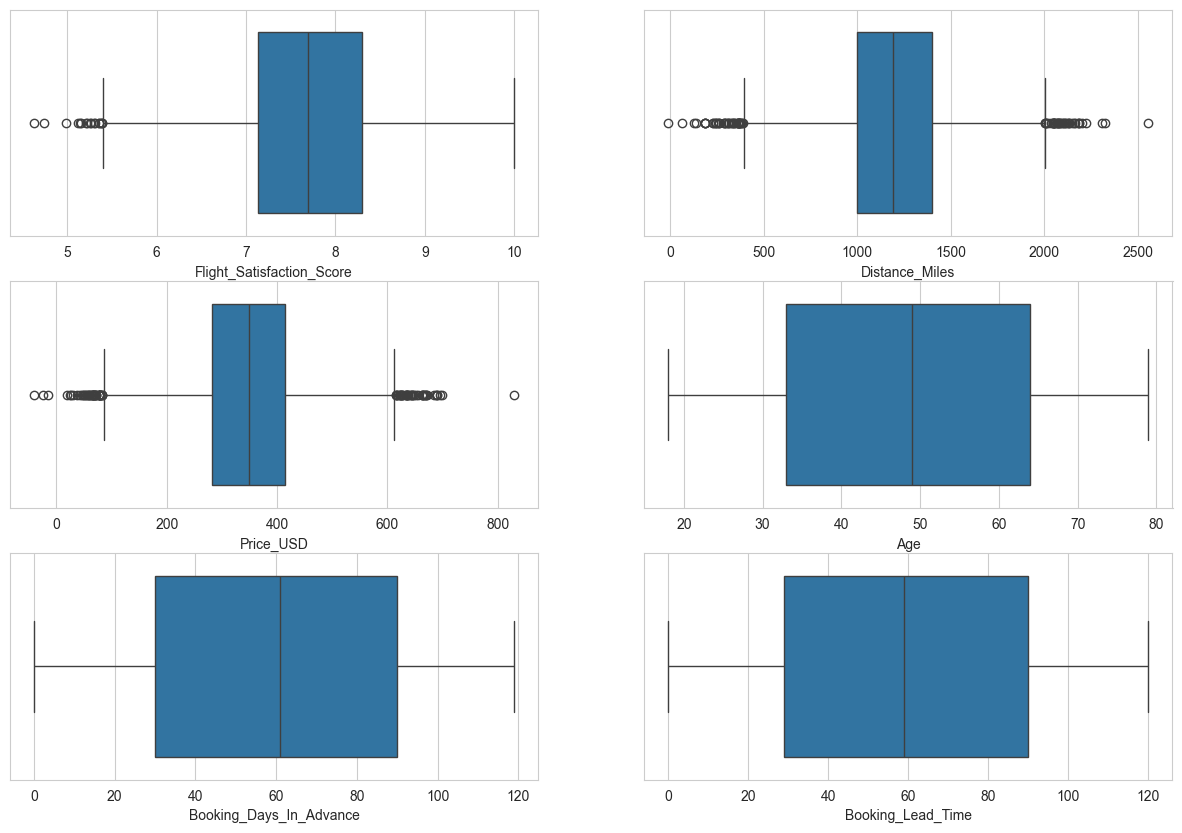

In [49]:
# 이상치 탐지 (boxplot)

sns.set_style('whitegrid')

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
# 'Distance_Miles', 'Price_USD', 'Age'
sns.boxplot(ax=axes[0,0], x = 'Flight_Satisfaction_Score', data = df)
sns.boxplot(ax=axes[0,1], x = 'Distance_Miles', data = df)
sns.boxplot(ax=axes[1,0], x = 'Price_USD', data = df)
sns.boxplot(ax=axes[1,1], x = 'Age', data = df)
sns.boxplot(ax=axes[2,0], x = 'Booking_Days_In_Advance', data = df)
sns.boxplot(ax=axes[2,1], x = 'Booking_Lead_Time', data = df)

In [50]:
# 수치형 변수들의 왜도/첨도 확인
print('----왜도----', df[soochi].skew(), sep='\n\n')
print('\n\n')
print('----첨도----', df[soochi].kurtosis(), sep='\n\n')
# 수치형 이상값X

----왜도----

Distance_Miles       0.021857
Price_USD            0.000083
Age                 -0.012769
Booking_Lead_Time    0.018994
Delay_Minutes        2.006456
dtype: float64



----첨도----

Distance_Miles       0.060614
Price_USD            0.067216
Age                 -1.207908
Booking_Lead_Time   -1.206049
Delay_Minutes        5.986651
dtype: float64


In [83]:
#ㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴ돌리지마
# 지연된 비행과 지연되지 않은 비행 확인
# df['is_delayed'] = df['Delay_Minutes'].apply(lambda x:1 if x>5 else 0)  # 출발 시간이 5분 초과 늦춰지면 지연으로 분류
# df['is_delayed'].value_counts(normalize=True)

is_delayed
1    0.5798
0    0.4202
Name: proportion, dtype: float64

<Axes: xlabel='Price_USD', ylabel='Count'>

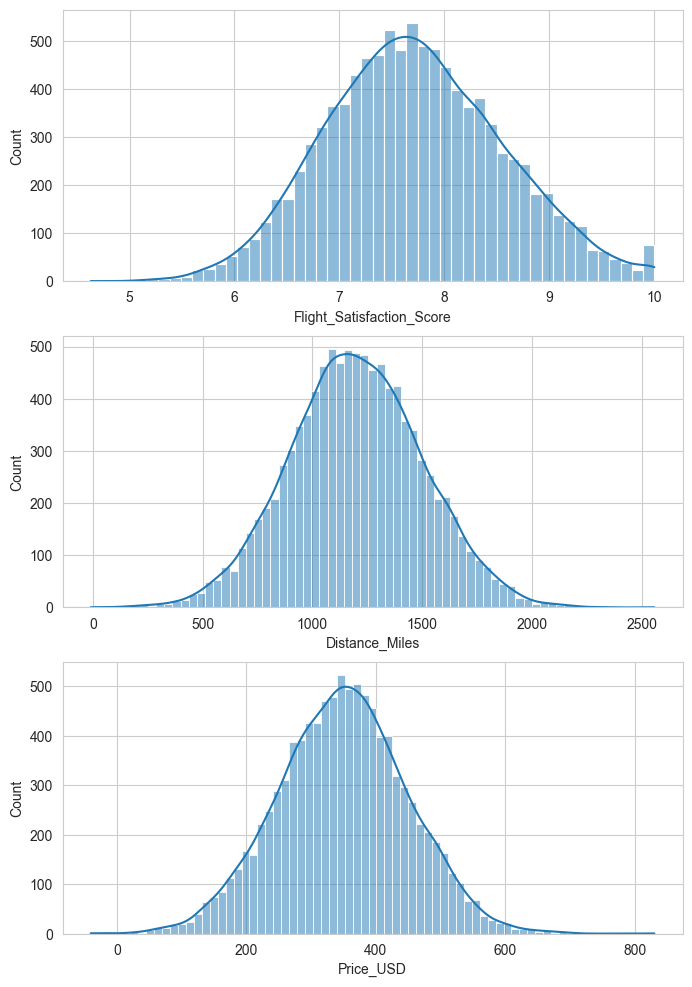

In [51]:
# 05. 변수 분포 시각화
# 연속형 변수 시각화

sns.set_style('whitegrid')

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
# 'Distance_Miles', 'Price_USD', 'Age'
sns.histplot(ax=axes[0], x = 'Flight_Satisfaction_Score', data = df, kde=True)
sns.histplot(ax=axes[1], x = 'Distance_Miles', data = df, kde=True)
sns.histplot(ax=axes[2], x = 'Price_USD', data = df, kde=True)
# sns.histplot(ax=axes[1,1], x = 'Age', data = df, kde=True);

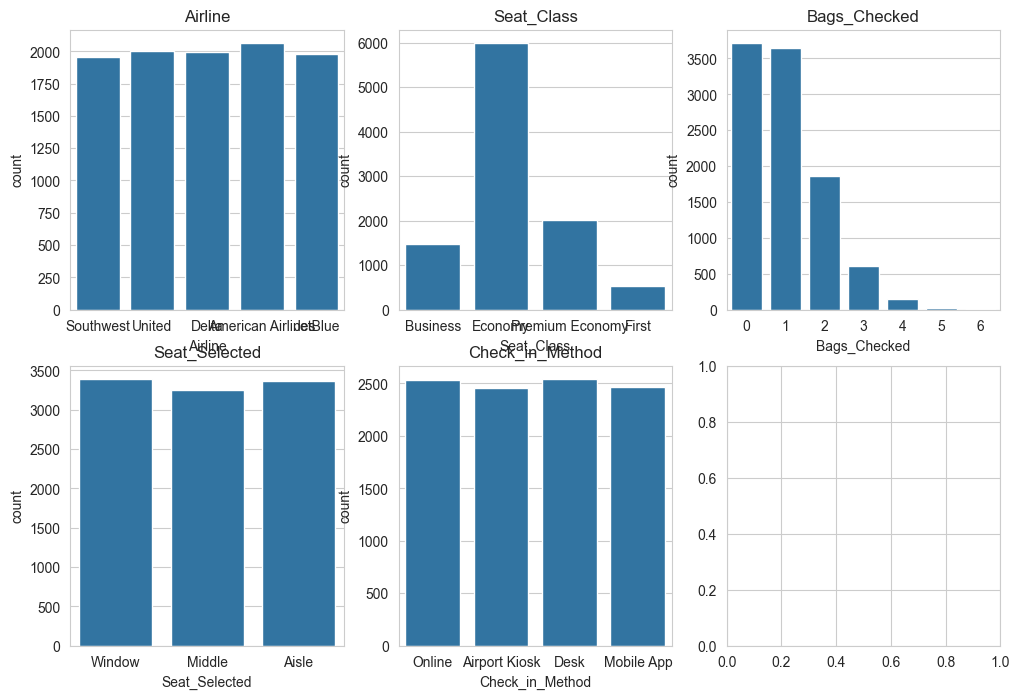

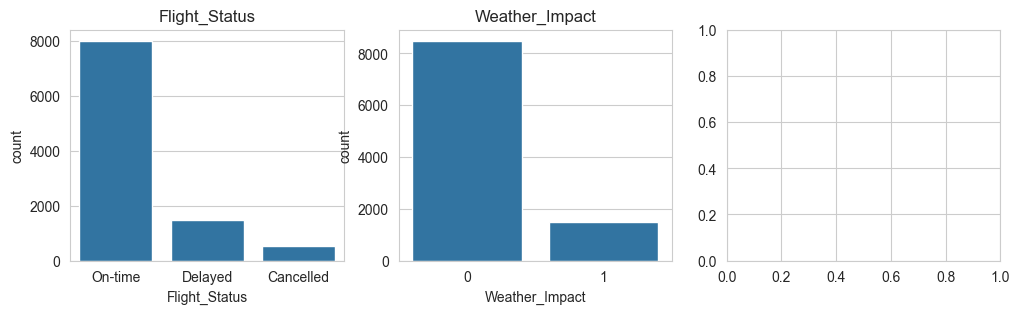

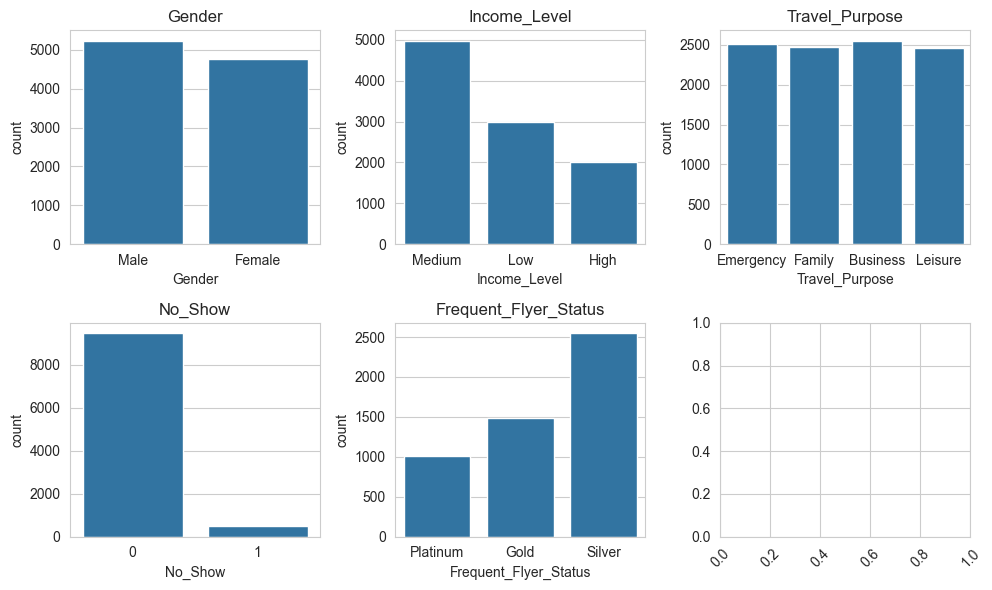

In [65]:
# 범주형 변수 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for idx, col in enumerate(service):
    sns.countplot(x=col, ax=axes[idx], data=df)
    axes[idx].set_title(col)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes = axes.flatten()
for idx, col in enumerate(airlines):
    sns.countplot(x=col, ax=axes[idx], data=df)
    axes[idx].set_title(col)
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
for idx, col in enumerate(pass_info):
    sns.countplot(x=col, ax=axes[idx], data=df)
    axes[idx].set_title(col)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [67]:
# 07. 상관관계 및 교차분석
# 타겟 - 수치형의 상관계수
sanggwan = ['Flight_Satisfaction_Score', 'Distance_Miles', 'Price_USD', 'Age']
round(df[sanggwan].corr(), 5)

,Flight_Satisfaction_Score,Distance_Miles,Price_USD,Age
Flight_Satisfaction_Score,1.00000,-0.00733,0.01524,0.00171
Distance_Miles,-0.00733,1.00000,-0.00311,0.01071
Price_USD,0.01524,-0.00311,1.00000,-0.01343
Age,0.00171,0.01071,-0.01343,1.00000


# 타겟 - 수치형 -> 상관계수
# 타겟 - 범주형 -> 교차표 crosstab

In [68]:
# 08. 데이터 전처리
# ID변수 제거
df.drop('Passenger_ID', axis=1, inplace=True)
df.drop('Flight_ID', axis=1, inplace=True)
df.columns

Index(['Airline', 'Departure_Airport', 'Arrival_Airport', 'Departure_Time',
       'Flight_Duration_Minutes', 'Flight_Status', 'Distance_Miles',
       'Price_USD', 'Age', 'Gender', 'Income_Level', 'Travel_Purpose',
       'Seat_Class', 'Bags_Checked', 'Frequent_Flyer_Status',
       'Check_in_Method', 'Flight_Satisfaction_Score', 'Delay_Minutes',
       'Booking_Days_In_Advance', 'No_Show', 'Weather_Impact', 'Seat_Selected',
       'Booking_Lead_Time'],
      dtype='object')

In [69]:
# 유일하게 관측되는 결측값, Frequent_flyer_Status의 결측값은 회원멤버십이 없다는 뜻의 None으로 대체
df['Frequent_Flyer_Status'].fillna('None', inplace=True)
df.isnull().sum()

C:\Users\play data\AppData\Local\Temp\ipykernel_20520\3014150972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Frequent_Flyer_Status'].fillna('None', inplace=True)


Airline                      0
Departure_Airport            0
Arrival_Airport              0
Departure_Time               0
Flight_Duration_Minutes      0
Flight_Status                0
Distance_Miles               0
Price_USD                    0
Age                          0
Gender                       0
Income_Level                 0
Travel_Purpose               0
Seat_Class                   0
Bags_Checked                 0
Frequent_Flyer_Status        0
Check_in_Method              0
Flight_Satisfaction_Score    0
Delay_Minutes                0
Booking_Days_In_Advance      0
No_Show                      0
Weather_Impact               0
Seat_Selected                0
Booking_Lead_Time            0
dtype: int64

In [70]:
# 지연됨 상태이지만 지연 시간이 0분인 레코드 확인, 드랍
d1 = df[df['Flight_Status']=='Delayed']
d2 = d1[d1['Delay_Minutes']==0.0]
df.drop(d2.index, inplace=True) # 주의! 한번밖에 못돌림

In [71]:
# 캔슬된 항공권의 만족도는 드랍
df = df[df['Flight_Status'] != 'Canceled']

In [72]:
# No_show 컬럼은 만족도 분석에 의미가 없다고 판단, 드랍
df.drop('No_Show', axis=1, inplace=True)

In [73]:
# 출발공항과 도착공항이 같은 레코드 제거
df = df[df['Departure_Airport'] != df['Arrival_Airport']]

In [74]:
# 공항 자체는 사용자의 "비행" 만족도에 영향을 주지 않는다고 판단. 제거
df.drop('Departure_Airport', axis=1, inplace=True)
df.drop('Arrival_Airport', axis=1, inplace=True)

In [76]:
# 비행 수하물은 일반적으로 2개.(why? 3개부터 유료)
# 따라서 3개 이상의 수하물은 모두 3orMore 값으로 변경
df['Bags_Checked'] = df['Bags_Checked'].apply(lambda x:'3orMore' if x >= 3 else x)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Airline                    8708 non-null   object 
 1   Departure_Time             8708 non-null   object 
 2   Flight_Duration_Minutes    8708 non-null   int64  
 3   Flight_Status              8708 non-null   object 
 4   Distance_Miles             8708 non-null   int64  
 5   Price_USD                  8708 non-null   float64
 6   Age                        8708 non-null   int64  
 7   Gender                     8708 non-null   object 
 8   Income_Level               8708 non-null   object 
 9   Travel_Purpose             8708 non-null   object 
 10  Seat_Class                 8708 non-null   object 
 11  Bags_Checked               8708 non-null   object 
 12  Frequent_Flyer_Status      8708 non-null   object 
 13  Check_in_Method            8708 non-null   object 
 1

In [78]:
# 초기 분리했던 컬럼들 재정립
service = ['Airline', 'Seat_Class', 'Bags_Checked', 'Seat_Selected', 'Check_in_Method']
airlines = ['Flight_Status', 'Weather_Impact']

pass_info = ['Gender', 'Income_Level', 'Travel_Purpose', 'Frequent_Flyer_Status']

In [79]:
# 09. Feature Engineering
# 이진 분류를 위한 범주형 변수들 더미화
# 더미화 이전에 날려야 하는 컬럼들 먼저 날릴것!!!
df_service_dummies = pd.get_dummies(df[service], columns=service)

dfs = df_service_dummies.copy()

In [80]:
df_airlines_dummies = pd.get_dummies(df[airlines], columns=airlines)

dfa = df_airlines_dummies.copy()

In [81]:
df_pass_dummies = pd.get_dummies(df[pass_info], columns=pass_info)

dfp = df_pass_dummies.copy()

# +@
## 로지스틱회귀 분석 -> 오즈비해석
### ML 파트

In [83]:
# 로지스틱회귀 모델 사용을 위해 타겟 변수 이진변수화
med = df['Flight_Satisfaction_Score'].median()

b1 = df['Flight_Satisfaction_Score'] >= med # 중위보다 높으면 만족(1)
b0 = df['Flight_Satisfaction_Score'] < med  # 중위보다 낮으면 불만족(0)

df.loc[b1, "SScore"] = 1
df.loc[b0, "SScore"] = 0

print(df['SScore'].value_counts())
target = df['SScore']

SScore
1.0    4354
0.0    4354
Name: count, dtype: int64


In [85]:
# 서비스 오즈비 해석
X = dfs
y = target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (6966, 20)
X_test shape: (1742, 20)


In [86]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',random_state=42,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Logreg Training set score:0.68863
Logreg Test set score:0.69920


In [87]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=42)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
#accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:0.71102
Random Forest Accuracy on test set:0.66361


In [88]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',random_state=42,n_jobs=-1)

# 그리드 서치
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

GridSearchCV max accuracy:0.68863
GridSearchCV best parameter: {'solver': 'lbfgs'}


In [89]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))
print('절편', np.round(best_clf.intercept_, 3))
print('회귀계수', np.round(best_clf.coef_, 3))

Accuracy on test set:0.69920
절편 [0.44]
회귀계수 [[ 0.106  0.062  0.145  0.01   0.103  0.596 -1.548  1.791 -0.412  0.086
   0.137  0.202  0.003  0.127  0.144  0.156  0.1    0.111  0.136  0.081]]


In [91]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기

feature_names = list(dfs.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dfc = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names,
                   columns=['coef'])
dfc = dfc.sort_values(by='coef', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리
dfc

,coef
Seat_Class_Economy,-1.548
Seat_Class_Premium Economy,-0.412
Bags_Checked_3orMore,0.003
Airline_Southwest,0.010
Airline_Delta,0.062
Check_in_Method_Online,0.081
Bags_Checked_0,0.086
Check_in_Method_Airport Kiosk,0.100
Airline_United,0.103
Airline_American Airlines,0.106


In [92]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기

feature_names = list(dfs.columns)
dfc = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dfc = dfc.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dfc

,Odds_ratio
Seat_Class_First,5.997
Seat_Class_Business,1.815
Bags_Checked_2,1.223
Seat_Selected_Window,1.169
Airline_JetBlue,1.156
Seat_Selected_Middle,1.155
Bags_Checked_1,1.147
Check_in_Method_Mobile App,1.145
Seat_Selected_Aisle,1.135
Check_in_Method_Desk,1.117


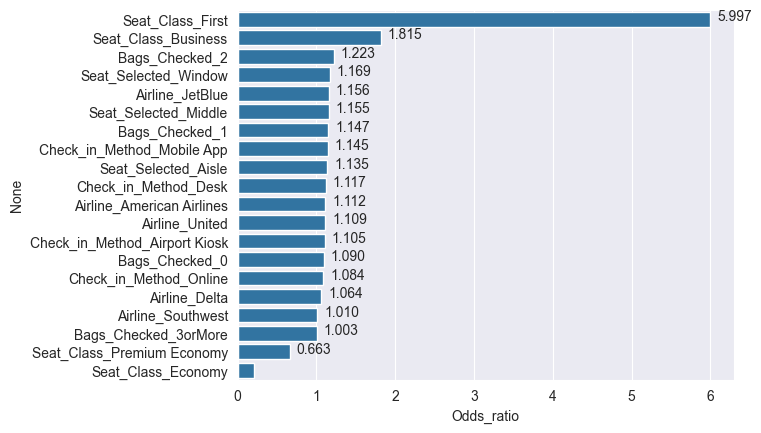

In [93]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.barplot(y=dfc.index, x="Odds_ratio", data=dfc)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2),
                xytext=(5, 10), textcoords='offset points')

In [94]:
# R2값 확인
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs=-1)
model = linr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set r2 score:{:.5f}".format(model.score(X_train, y_train)))
print ("Linear Regression Test set r2 score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set r2 score:0.17234
Linear Regression Test set r2 score:0.19747


In [95]:
# 항공사 환경 오즈비 해석
X = dfa
y = target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (6966, 5)
X_test shape: (1742, 5)


[LogReg Test Accuracy] 0.49828
Best Params: {'solver': 'lbfgs'}


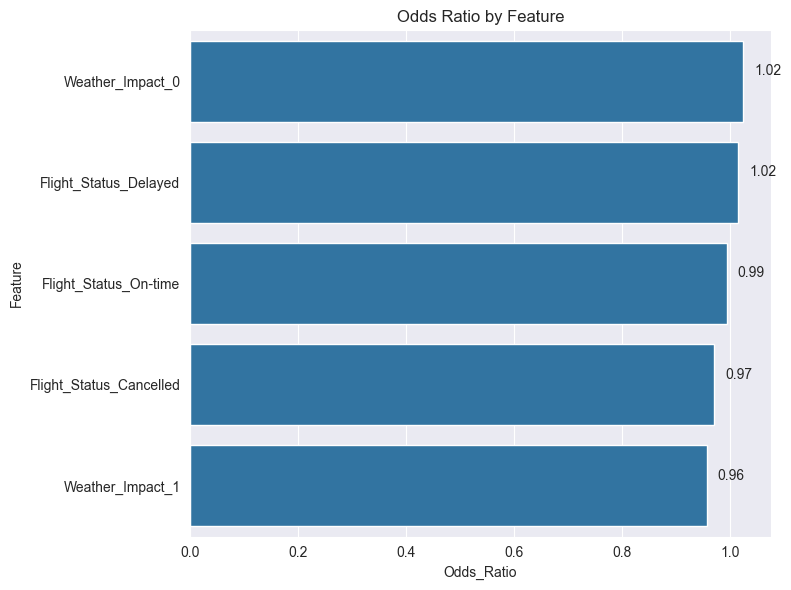

In [98]:
# 1. 로지스틱 회귀 + 그리드서치
params = {'solver': ['lbfgs', 'saga']}
lr = LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000)

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)

# 2. 테스트셋 정확도
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print(f"[LogReg Test Accuracy] {accuracy_score(y_test, pred):.5f}")
print("Best Params:", grid_lr.best_params_)

# 3. 오즈비 계산 및 시각화
df_odds = pd.DataFrame({
    "Feature": dfa.columns,
    "Odds_Ratio": np.round(np.exp(best_clf.coef_[0]), 3)
}).sort_values(by="Odds_Ratio", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(y="Feature", x="Odds_Ratio", data=df_odds)
for p in plt.gca().patches:
    plt.text(p.get_width() + 0.02, p.get_y() + 0.3, f'{p.get_width():.2f}', va='center')
plt.title("Odds Ratio by Feature")
plt.tight_layout()
plt.show()

In [99]:
# 고객정보 오즈비 해석
X = dfp
y = target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (6966, 13)
X_test shape: (1742, 13)


[LogReg Test Accuracy] 0.50287
Best Params: {'solver': 'saga'}


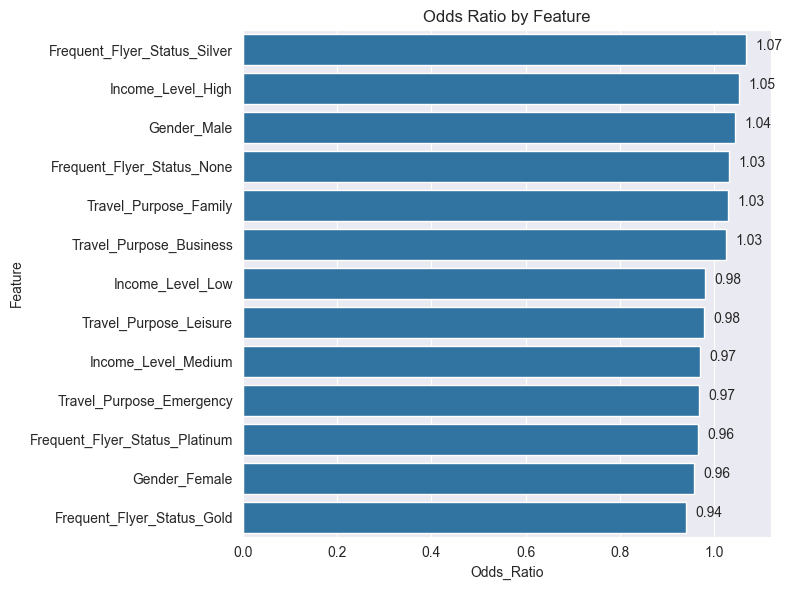

In [100]:
# 1. 로지스틱 회귀 + 그리드서치
params = {'solver': ['lbfgs', 'saga']}
lr = LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000)

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)

# 2. 테스트셋 정확도
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print(f"[LogReg Test Accuracy] {accuracy_score(y_test, pred):.5f}")
print("Best Params:", grid_lr.best_params_)

# 3. 오즈비 계산 및 시각화
df_odds = pd.DataFrame({
    "Feature": dfp.columns,
    "Odds_Ratio": np.round(np.exp(best_clf.coef_[0]), 3)
}).sort_values(by="Odds_Ratio", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(y="Feature", x="Odds_Ratio", data=df_odds)
for p in plt.gca().patches:
    plt.text(p.get_width() + 0.02, p.get_y() + 0.3, f'{p.get_width():.2f}', va='center')
plt.title("Odds Ratio by Feature")
plt.tight_layout()
plt.show()